<a href="https://colab.research.google.com/github/Batovs/Poker/blob/main/Perfis_Vil%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

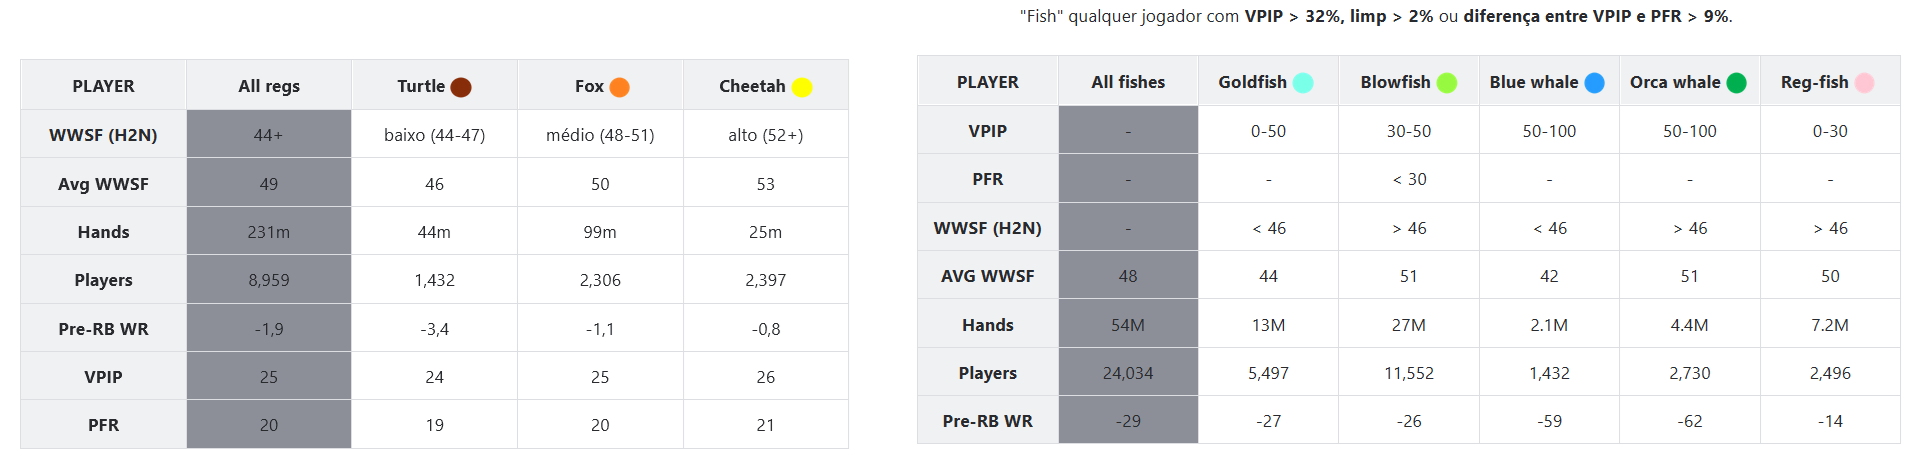

In [30]:
#bibliotecas
import pandas as pd
import numpy as np

In [31]:
maos = 500
flops = 500

#importar um csv e colocar uma tabela pandas

df = pd.read_csv('teste_perfil.csv')

In [32]:
#Tratamento de dados
# Função para converter strings com vírgula para milhar em inteiros
def convert_hands(value):
  if isinstance(value, str):
    return int(value.replace(',', ''))
  return value

# Aplicar a função à coluna "Hands" do DataFrame
df['Hands'] = df['Hands'].apply(convert_hands)
df['Saw Flop'] = df['Saw Flop'].apply(convert_hands)

df = df.replace('-', 0)

#definir o tipo de dados
df = df.astype({"Hands": int, "Saw Flop": int, "Limp": float, "VPIP": float, "PFR": float, "WWSF": float})

In [33]:
# Reg ou Fish
# Crie a coluna 'Reg ou Fish' com base nas condições
df['Reg ou Fish'] = np.where(
    (df['VPIP'] > 32) | (df['Limp'] > 2) | (df['VPIP'] - df['PFR'] > 9), 'Fish', 'Reg'
)

# Aplicar a regra para "Reg ou Fish" e "pouca amostragem"
df.loc[df['Hands'] < maos, 'Reg ou Fish'] = 'pouca amostragem'

# Perfis de Reg ou Fish
def define_perfil(row):
    reg_ou_fish = row['Reg ou Fish']
    vpip = row['VPIP']
    pfr = row['PFR']
    wwsf = row['WWSF']
    saw_flop = row['Saw Flop'] # Accessing Saw Flop column

    if saw_flop < flops:
        return "pouca amostragem" # Return "pouca amostragem" if Saw Flop < 100

    if reg_ou_fish == 'Fish':
        if 0 <= vpip <= 50 and wwsf < 43.5:
            return 'Goldfish'
        elif 30 <= vpip <= 50 and pfr < 30 and wwsf > 43.5:
            return 'Blowfish'
        elif 50 < vpip <= 100 and wwsf < 43.5:
            return 'Blue Whale'
        elif 50 < vpip <= 100 and wwsf > 43.5:
            return 'Orca Whale'
        elif 0 <= vpip <= 30 and wwsf > 43.5:
            return 'Reg-fish'
    elif reg_ou_fish == 'Reg':
        if wwsf < 46.5:
            return 'Turtle'
        elif 46.5 <= wwsf <= 49.5:
            return 'Fox'
        elif wwsf > 49.5:
            return 'Cheetah'
    elif reg_ou_fish == 'pouca amostragem':
        return 'pouca amostragem'
    return 'Undefined'  # Handle cases that don't match any criteria

df['Perfil'] = df.apply(define_perfil, axis=1)



#exportar csv
df.to_csv('perfis_total.csv', index=False)

In [34]:
# Criar DataFrame df_regfish com as linhas que não possuem "pouca amostragem"
df_regfish = df[df['Reg ou Fish'] != 'pouca amostragem']
df_perfis = df[df['Perfil'] != 'pouca amostragem']

# Exportar df_regfish para 'perfis_regfish.csv'
df_regfish.to_csv('perfis_regfish.csv', index=False)
df_perfis.to_csv('perfis.csv', index=False)